# 移動平均線

## 程式實作：移動平均線取得與計算

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import mplfinance as mpf
import numpy as np

In [2]:
##### 使用2022年9月19日到2023年5月30日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day7_Day13.xlsx')

# 保存K線的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','SMA60','SMA120','SMA240','MA5','MA10'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10']) 

# 將K線的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將K線的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

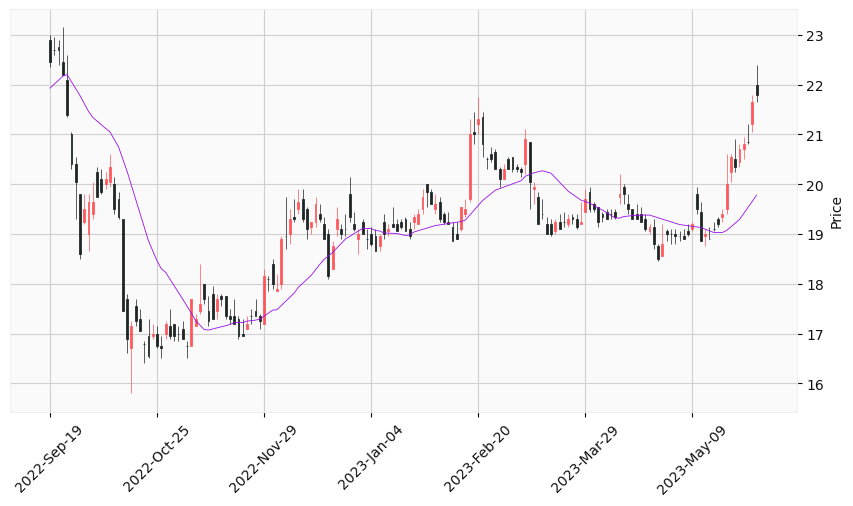

In [3]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定移動平均線
added_plots={
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.6,color='xkcd:violet')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()))
mpf.plot(df_k_line,**kwargs) 

#### 使用DataFrame rolling方式計算移動平均

[    nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan 19.985  19.725  19.4425 19.1475 18.865  18.645  18.4625 18.295
 18.225  18.0975 17.9625 17.83   17.6875 17.5325 17.4125 17.26   17.165
 17.0825 17.0725 17.0925 17.12   17.1425 17.1575 17.1825 17.215  17.2125
 17.2225 17.2475 17.255  17.275  17.29   17.3475 17.4075 17.47   17.48
 17.56   17.6275 17.7075 17.81   17.9275 18.0075 18.0775 18.1725 18.2875
 18.3925 18.49   18.55   18.6275 18.725  18.8075 18.9    18.96   19.01
 19.06   19.115  19.115  19.1075 19.075  19.0575 19.025  19.015  19.0175
 19.0075 18.985  18.9725 18.975  19.035  19.0675 19.09   19.1325 19.1575
 19.17   19.18   19.1925 19.2025 19.2    19.205  19.25   19.2775 19.3775
 19.4725 19.58   19.6675 19.735  19.8075 19.875  19.9125 19.9575 19.985
 20.0075 20.0425 20.075  20.155  20.195  20.2325 20.25   20.275  20.2475
 20.2225 20.135  20.04   19.9375 19.8625 19.8025 19.735  1

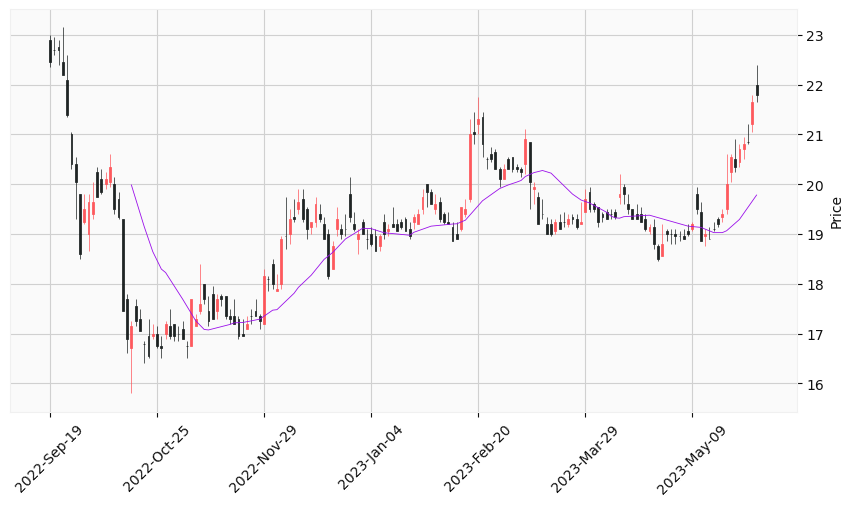

In [4]:
# 使用DataFrame rolling方式計算20日移動平均
rolling_sma20 = df_k_line['Close'].rolling(window=20).mean()
print(rolling_sma20.values)

# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定移動平均線
added_plots={
    "SMA20": mpf.make_addplot(rolling_sma20,width=0.6,color='xkcd:violet')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()))
mpf.plot(df_k_line,**kwargs) 

#### 使用talib套件計算移動平均

In [5]:
from talib.abstract import *

# 當使用talib Abstract API時，DataFrame欄位名稱需為小寫
# 請參考書籍：Python：量化交易 Ta-Lib 技術指標 139個活用技巧
df_k_line_talib = df_k_line.copy()
df_k_line_talib.columns=[ i.lower() for i in df_k_line_talib.columns]

[    nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan     nan     nan     nan     nan     nan     nan     nan     nan
     nan 19.985  19.725  19.4425 19.1475 18.865  18.645  18.4625 18.295
 18.225  18.0975 17.9625 17.83   17.6875 17.5325 17.4125 17.26   17.165
 17.0825 17.0725 17.0925 17.12   17.1425 17.1575 17.1825 17.215  17.2125
 17.2225 17.2475 17.255  17.275  17.29   17.3475 17.4075 17.47   17.48
 17.56   17.6275 17.7075 17.81   17.9275 18.0075 18.0775 18.1725 18.2875
 18.3925 18.49   18.55   18.6275 18.725  18.8075 18.9    18.96   19.01
 19.06   19.115  19.115  19.1075 19.075  19.0575 19.025  19.015  19.0175
 19.0075 18.985  18.9725 18.975  19.035  19.0675 19.09   19.1325 19.1575
 19.17   19.18   19.1925 19.2025 19.2    19.205  19.25   19.2775 19.3775
 19.4725 19.58   19.6675 19.735  19.8075 19.875  19.9125 19.9575 19.985
 20.0075 20.0425 20.075  20.155  20.195  20.2325 20.25   20.275  20.2475
 20.2225 20.135  20.04   19.9375 19.8625 19.8025 19.735  1

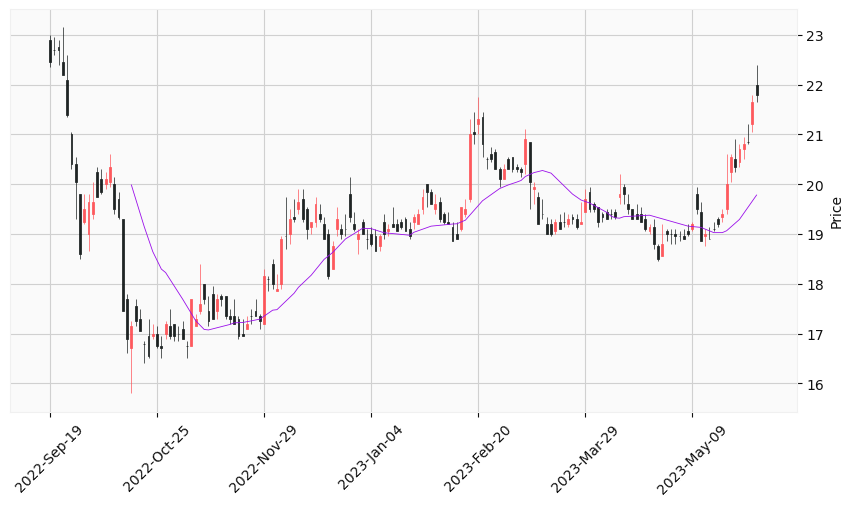

In [6]:
# 使用talib套件計算20日移動平均
talib_sma20 = SMA(df_k_line_talib,timeperiod=20)
print(talib_sma20.values)

# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定移動平均線
added_plots={
    "SMA20": mpf.make_addplot(talib_sma20,width=0.6,color='xkcd:violet')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()))
mpf.plot(df_k_line,**kwargs) 

#### 比對不同方式產生的移動平均線

In [7]:
# 比對看盤軟體與DataFrame rolling方式計算
# 注意：浮點數因為會有計算誤差，因此比對不能用numpy.equal
# 另外，只比較到小數點兩位(看盤軟體只有小數點兩位)
if np.allclose( np.array(df_sma['SMA20']), np.array(rolling_sma20), atol=1e-02, equal_nan=True) is False :
    np_diff = np.isclose(np.array(df_sma['SMA20']), np.array(rolling_sma20), atol=1e-02 , equal_nan=True)
    for idx in range( 0, len(np_diff)) :
        if np_diff[idx] == False :
            print('日期{}比對結果不同：看盤軟體20日移動平均＝{:.2f}，Rolling方式計算20日移動平均＝{}'.format(df_sma.iloc[idx].name.strftime('%Y-%m-%d'),df_sma.iloc[idx]['SMA20'],rolling_sma20.iloc[idx]))
else :
    print('比對結果相同')

日期2022-09-19比對結果不同：看盤軟體20日移動平均＝21.93，Rolling方式計算20日移動平均＝nan
日期2022-09-20比對結果不同：看盤軟體20日移動平均＝22.00，Rolling方式計算20日移動平均＝nan
日期2022-09-21比對結果不同：看盤軟體20日移動平均＝22.09，Rolling方式計算20日移動平均＝nan
日期2022-09-22比對結果不同：看盤軟體20日移動平均＝22.17，Rolling方式計算20日移動平均＝nan
日期2022-09-23比對結果不同：看盤軟體20日移動平均＝22.20，Rolling方式計算20日移動平均＝nan
日期2022-09-26比對結果不同：看盤軟體20日移動平均＝22.07，Rolling方式計算20日移動平均＝nan
日期2022-09-27比對結果不同：看盤軟體20日移動平均＝21.96，Rolling方式計算20日移動平均＝nan
日期2022-09-28比對結果不同：看盤軟體20日移動平均＝21.78，Rolling方式計算20日移動平均＝nan
日期2022-09-29比對結果不同：看盤軟體20日移動平均＝21.61，Rolling方式計算20日移動平均＝nan
日期2022-09-30比對結果不同：看盤軟體20日移動平均＝21.46，Rolling方式計算20日移動平均＝nan
日期2022-10-03比對結果不同：看盤軟體20日移動平均＝21.34，Rolling方式計算20日移動平均＝nan
日期2022-10-04比對結果不同：看盤軟體20日移動平均＝21.26，Rolling方式計算20日移動平均＝nan
日期2022-10-05比對結果不同：看盤軟體20日移動平均＝21.18，Rolling方式計算20日移動平均＝nan
日期2022-10-06比對結果不同：看盤軟體20日移動平均＝21.12，Rolling方式計算20日移動平均＝nan
日期2022-10-07比對結果不同：看盤軟體20日移動平均＝21.05，Rolling方式計算20日移動平均＝nan
日期2022-10-11比對結果不同：看盤軟體20日移動平均＝20.90，Rolling方式計算20日移動平均＝nan
日期2022-10-12比對結果不同：看盤軟體20日移動平均＝20.75，Rol

In [8]:
# 比對DataFrame rolling方式計算與talib計算
# 注意：浮點數因為會有計算誤差，因此比對不能用numpy.equal
if np.allclose( np.array(rolling_sma20), np.array(talib_sma20), equal_nan=True) is False :
    np_diff = np.isclose( np.array(rolling_sma20.values), np.array(talib_sma20.values) ,equal_nan=True)
    for idx in range( 0, len(np_diff)) :
        if np_diff[idx] == False :
            print('日期{}比對結果不同：Rolling方式計算20日移動平均＝{:.2f}，talib計算20日移動平均＝{}'.format(rolling_sma20.iloc[idx].name.strftime('%Y-%m-%d'),rolling_sma20.iloc[idx],talib_sma20.iloc[idx]))
else :
    print('比對結果相同')

比對結果相同


## 程式實作：從移動平均線判斷短、中、長期的趨勢

In [9]:
# 移動平均線趨勢判定程序
def moving_average_trend(sma):
    now_sma  = sma.iloc[-1].to_dict()
    prev_sma = sma.iloc[-2].to_dict()
    # 確認移動平均線方向：↑ : 'u' , ↓ : 'd' , ＝ : '='
    sma5_dir = 'u' if now_sma['SMA5'] > prev_sma['SMA5'] else 'd' if now_sma['SMA5'] < prev_sma['SMA5'] else '='
    sma10_dir = 'u' if now_sma['SMA10'] > prev_sma['SMA10'] else 'd' if now_sma['SMA10'] < prev_sma['SMA10'] else '='
    sma20_dir = 'u' if now_sma['SMA20'] > prev_sma['SMA20'] else 'd' if now_sma['SMA20'] < prev_sma['SMA20'] else '='
    sma60_dir = 'u' if now_sma['SMA60'] > prev_sma['SMA60'] else 'd' if now_sma['SMA60'] < prev_sma['SMA60'] else '='
    sma120_dir = 'u' if now_sma['SMA120'] > prev_sma['SMA120'] else 'd' if now_sma['SMA120'] < prev_sma['SMA120'] else '='
    sma240_dir = 'u' if now_sma['SMA240'] > prev_sma['SMA240'] else 'd' if now_sma['SMA240'] < prev_sma['SMA240'] else '='
    # 短期趨勢
    if sma5_dir == sma10_dir :
        if sma5_dir == 'u' :
            print('短期趨勢：上升')
        elif sma5_dir == 'd' :
            print('短期趨勢：下降')
    else :
        print('短期趨勢：盤整')
    # 中期趨勢
    if sma20_dir == sma60_dir :
        if sma20_dir == 'u' :
            print('中期趨勢：上升')
        elif sma20_dir == 'd' :
            print('中期趨勢：下降')
    else :
        print('中期趨勢：盤整')
    # 長期趨勢
    if sma120_dir == sma240_dir :
        if sma120_dir == 'u' :
            print('長期趨勢：上升')
        elif sma120_dir == 'd' :
            print('長期趨勢：下降')
    else :
        print('長期趨勢：盤整')

In [10]:
# 2023年5月30日移動平均線趨勢判斷
moving_average_trend(df_sma)

短期趨勢：上升
中期趨勢：上升
長期趨勢：盤整
